In [1]:
import os
import numpy as np
import pandas as pd
from random import shuffle
import cv2
from random import randrange
import matplotlib.pyplot as plt

In [2]:
class_name = ['Aortic enlargement',
 'Atelectasis',
 'Calcification',
 'Cardiomegaly',
 'Consolidation',
 'ILD',
 'Infiltration',
 'Lung Opacity',
 'Nodule/Mass',
 'Other lesion',
 'Pleural effusion',
 'Pleural thickening',
 'Pneumothorax',
 'Pulmonary fibrosis']

col_name = ['name','Aortic enlargement',
 'Atelectasis',
 'Calcification',
 'Cardiomegaly',
 'Consolidation',
 'ILD',
 'Infiltration',
 'Lung Opacity',
 'Nodule/Mass',
 'Other lesion',
 'Pleural effusion',
 'Pleural thickening',
 'Pneumothorax',
 'Pulmonary fibrosis']

dict_class = {'Aortic enlargement': 0,
 'Atelectasis': 1,
 'Calcification': 2,
 'Cardiomegaly': 3,
 'Consolidation': 4,
 'ILD': 5,
 'Infiltration': 6,
 'Lung Opacity': 7,
 'Nodule/Mass': 8,
 'Other lesion': 9,
 'Pleural effusion': 10,
 'Pleural thickening': 11,
 'Pneumothorax': 12,
 'Pulmonary fibrosis': 13}

In [3]:
df = pd.read_csv("/home/kong/14_disease_2022/dataset/train.csv")

In [4]:
df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
...,...,...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN,2444,3200
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN,1994,2430
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN,2048,2500
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0,1968,2040


In [5]:
df['class_name'].value_counts()

No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: class_name, dtype: int64

In [6]:
df = df.drop(df[df.class_name == "No finding"].index)
df = df.reset_index(drop=True)

In [7]:
df['class_name'].value_counts()

Aortic enlargement    7162
Cardiomegaly          5427
Pleural thickening    4842
Pulmonary fibrosis    4655
Nodule/Mass           2580
Lung Opacity          2483
Pleural effusion      2476
Other lesion          2203
Infiltration          1247
ILD                   1000
Calcification          960
Consolidation          556
Atelectasis            279
Pneumothorax           226
Name: class_name, dtype: int64

In [8]:
df['class_id'].value_counts()

0     7162
3     5427
11    4842
13    4655
8     2580
7     2483
10    2476
9     2203
6     1247
5     1000
2      960
4      556
1      279
12     226
Name: class_id, dtype: int64

In [9]:
df.shape

(36096, 10)

In [10]:
df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
1,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
2,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,2540,3072
3,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,2285,2555
4,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0,2568,3353
...,...,...,...,...,...,...,...,...,...,...
36091,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,R9,240.0,1550.0,562.0,2001.0,2304,2880
36092,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,R10,1163.0,787.0,1338.0,941.0,3072,3072
36093,22672ab82c290c20b86863291e25ef6c,ILD,5,R9,299.0,664.0,794.0,1508.0,2048,2500
36094,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,6.0,670.0,272.0,1736.0,2304,2880


9a5094b2563a1ef3ff50dc5c7ff71345
Cardiomegaly


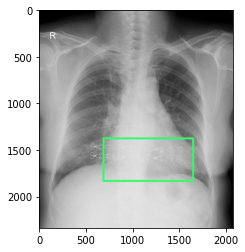

In [11]:
i = 0
print(df['image_id'][i])
print(df['class_name'][i])
path_img = f"/ramdisk/vinbigdata-chest-xray-png/train/{df['image_id'][i]}.png"

data_img = cv2.imread(path_img)
result = cv2.rectangle(data_img,(int(df['x_min'][i]),int(df['y_min'][i])),(int(df['x_max'][i]),int(df['y_max'][i])),(randrange(255),randrange(255),randrange(255)),20)
plt.imshow(data_img)

In [12]:
print(data_img.shape)

(2336, 2080, 3)


In [13]:
df['x_min'] = df.apply(lambda row: (row.x_min)/row.width, axis =1)
df['y_min'] = df.apply(lambda row: (row.y_min)/row.height, axis =1)

df['x_max'] = df.apply(lambda row: (row.x_max)/row.width, axis =1)
df['y_max'] = df.apply(lambda row: (row.y_max)/row.height, axis =1)

df['x_mid'] = df.apply(lambda row: (row.x_max+row.x_min)/2, axis =1)
df['y_mid'] = df.apply(lambda row: (row.y_max+row.y_min)/2, axis =1)

df['w'] = df.apply(lambda row: (row.x_max-row.x_min), axis =1)
df['h'] = df.apply(lambda row: (row.y_max-row.y_min), axis =1)

df['area'] = df['w']*df['h']
df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,x_mid,y_mid,w,h,area
0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,0.332212,0.588613,0.794712,0.783818,2080,2336,0.563462,0.686216,0.462500,0.195205,0.090283
1,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,0.548611,0.257986,0.699219,0.353819,2304,2880,0.623915,0.305903,0.150608,0.095833,0.014433
2,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,0.246850,0.116211,0.372835,0.140951,2540,3072,0.309843,0.128581,0.125984,0.024740,0.003117
3,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,0.589497,0.095890,0.957549,0.848924,2285,2555,0.773523,0.472407,0.368053,0.753033,0.277156
4,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,0.216900,0.701461,0.262850,0.740829,2568,3353,0.239875,0.721145,0.045950,0.039368,0.001809


In [14]:
len(df)

36096

In [15]:
df['class_name'].value_counts()

Aortic enlargement    7162
Cardiomegaly          5427
Pleural thickening    4842
Pulmonary fibrosis    4655
Nodule/Mass           2580
Lung Opacity          2483
Pleural effusion      2476
Other lesion          2203
Infiltration          1247
ILD                   1000
Calcification          960
Consolidation          556
Atelectasis            279
Pneumothorax           226
Name: class_name, dtype: int64

In [18]:
df['class_name'].value_counts()

Aortic enlargement    7162
Cardiomegaly          5427
Pleural thickening    4842
Pulmonary fibrosis    4655
Nodule/Mass           2580
Lung Opacity          2483
Pleural effusion      2476
Other lesion          2203
Infiltration          1247
ILD                   1000
Calcification          960
Consolidation          556
Atelectasis            279
Pneumothorax           226
Name: class_name, dtype: int64

In [16]:
df['class_id'].value_counts()

0     7162
3     5427
11    4842
13    4655
8     2580
7     2483
10    2476
9     2203
6     1247
5     1000
2      960
4      556
1      279
12     226
Name: class_id, dtype: int64

In [23]:
class_name = {}
for i in range(len(df['class_name'].values)):
    class_name[df['class_name'].values[i]] = df['class_id'].values[i]
class_name = dict(sorted(class_name.items(), key=lambda item: item[1]))
class_name

{'Aortic enlargement': 0,
 'Atelectasis': 1,
 'Calcification': 2,
 'Cardiomegaly': 3,
 'Consolidation': 4,
 'ILD': 5,
 'Infiltration': 6,
 'Lung Opacity': 7,
 'Nodule/Mass': 8,
 'Other lesion': 9,
 'Pleural effusion': 10,
 'Pleural thickening': 11,
 'Pneumothorax': 12,
 'Pulmonary fibrosis': 13}

In [24]:
class_name = [i for i in class_name.keys()]
class_name

['Aortic enlargement',
 'Atelectasis',
 'Calcification',
 'Cardiomegaly',
 'Consolidation',
 'ILD',
 'Infiltration',
 'Lung Opacity',
 'Nodule/Mass',
 'Other lesion',
 'Pleural effusion',
 'Pleural thickening',
 'Pneumothorax',
 'Pulmonary fibrosis']

In [25]:
os.makedirs('/home/kong/14_disease_2022/dataset/label_7', exist_ok=True)

In [26]:
for i in range(len(df)):
    f = open(f"/home/kong/14_disease_2022/dataset/label_7/{df['image_id'][i]}.txt", "a")
    read_file = open(f"/home/kong/14_disease_2022/dataset/label_7/{df['image_id'][i]}.txt", "r")
    if read_file.read() == '':
        read_file.close()
        f.write("%r"%df['class_id'][i])
        f.write(" "+"%r"%df['x_mid'][i])
        f.write(" "+"%r"%df['y_mid'][i])
        f.write(" "+"%r"%df['w'][i])
        f.write(" "+"%r"%df['h'][i])
        f.close()



    else:
    #     f.write("%r\n"%df['class_id'][i])
        f.write('\n')
        f.write("%r"%df['class_id'][i])

        f.write(" "+"%r"%df['x_mid'][i])
        f.write(" "+"%r"%df['y_mid'][i])
        f.write(" "+"%r"%df['w'][i])
        f.write(" "+"%r"%df['h'][i])
        f.close()
        read_file.close()
        
    

In [27]:
dir_list = os.listdir("/home/kong/14_disease_2022/dataset/label_7")

In [28]:
len(dir_list)

4394

In [29]:
dir_list

['b685d041e15fd6b5ffbac258f0673518.txt',
 'ed89af5c7c30f2c96b4cd8a5402748ae.txt',
 'b5c56a5624857bd608eeadd16a7f566b.txt',
 '84a27b87601b81cd39889ced2d489f70.txt',
 '7e2859fc7565a9b2701b29d682056319.txt',
 '7cd74b5a3c85b77c997f56cdb4995384.txt',
 '95bbadf9fca1ad13b442ab060935e06c.txt',
 '2b658b536fb15c22f623c3d6672b64d0.txt',
 '54fa20d07ac42e467ab67a87cf8563a3.txt',
 'd3780a0c70b4737cd12874433023c40a.txt',
 '6cb76e80cd8312a6cb453b11d5ea44f8.txt',
 '381e9c224c892d437f498779e349469e.txt',
 '299057220a9508923d271ac70bff843b.txt',
 'f4b8c5c84f200ee9e9faba45bb2b0baa.txt',
 '9a44147b1b764d0cbd57a317bd22e48c.txt',
 'bdd7f0b920e6c5ea82526986ffb63001.txt',
 '9dfc32d8ff0e7a5b65dcda7fc2899881.txt',
 '7a350dc1bcdf2fb34fcc57f05adf9da7.txt',
 '9d366d706dc228d1721d3f16b139221f.txt',
 '74335ad1e0f78abc3b8d9c4d3380b5be.txt',
 '06efcd37617307118fd48b3a493c133b.txt',
 '72d2a32355662fd12a16420bd689bbf9.txt',
 '7b759182d86f6a44b377ffcfce8a3b53.txt',
 'b2c97c1426a846ada2d815a4ecc67893.txt',
 '01f88c998eea22

# Data augment

In [56]:
from sklearn.preprocessing import MultiLabelBinarizer
import cv2
import os
import matplotlib.pyplot as plt
import albumentations as A
from tqdm import tqdm

In [57]:
os.makedirs('/home/kong/14_disease_2022/dataset/image_aug_7', exist_ok=True)
os.makedirs('/home/kong/14_disease_2022/dataset/label_aug_7', exist_ok=True)

In [58]:
dir_list = os.listdir("/home/kong/14_disease_2022/dataset/label_7")

In [59]:
len(dir_list)

4394

In [60]:
class_name = ['Aortic enlargement',
     'Atelectasis',
     'Calcification',
     'Cardiomegaly',
     'Consolidation',
     'ILD',
     'Infiltration',
     'Lung Opacity',
     'Nodule/Mass',
     'Other lesion',
     'Pleural effusion',
     'Pleural thickening',
     'Pneumothorax',
     'Pulmonary fibrosis']

In [61]:
col_name = ['name','Aortic enlargement',
     'Atelectasis',
     'Calcification',
     'Cardiomegaly',
     'Consolidation',
     'ILD',
     'Infiltration',
     'Lung Opacity',
     'Nodule/Mass',
     'Other lesion',
     'Pleural effusion',
     'Pleural thickening',
     'Pneumothorax',
     'Pulmonary fibrosis']

In [62]:
df = pd.DataFrame(columns = ['name','class'])
dir_img = os.listdir("/home/kong/14_disease_2022/dataset/label_7")
path_label = "/home/kong/14_disease_2022/dataset/label_7//"

name_ = []
class_ = []

for i in range(len(dir_img)):
    f = open(path_label+dir_img[i].split('.txt')[0]+'.txt', "r")
    num_class = f.read()
    e = list(set([i.split()[0] for i in num_class.splitlines()]))
    e = [int(i) for i in e]
    name_.append(dir_img[i].split('.txt')[0])
    class_.append(e)
df['name'] = name_
df['class'] = class_
df

,name,class
0,b685d041e15fd6b5ffbac258f0673518,"[13, 0, 5]"
1,ed89af5c7c30f2c96b4cd8a5402748ae,"[3, 0]"
2,b5c56a5624857bd608eeadd16a7f566b,"[11, 0, 10, 12, 9, 7, 4]"
3,84a27b87601b81cd39889ced2d489f70,"[13, 11, 0, 10, 5, 9, 8]"
4,7e2859fc7565a9b2701b29d682056319,"[13, 3, 0]"
...,...,...
4389,c9e29220b5d0f9cfdb250f0872648a89,"[7, 3, 0]"
4390,7c53cf2eb4f08dbc905b85f144f96b45,"[9, 13, 6, 0]"
4391,5a906d95202259b2e2ac0a2aee8f2f65,"[3, 11, 0]"
4392,3d6be0fd234f4be9a57ea0ec00d1e6b6,"[13, 11, 3, 10]"


In [63]:
mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform(df['class']),columns=class_name)
df['name'] = name_
df=df.reindex(columns=col_name)
df

,name,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
0,b685d041e15fd6b5ffbac258f0673518,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,ed89af5c7c30f2c96b4cd8a5402748ae,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,b5c56a5624857bd608eeadd16a7f566b,1,0,0,0,1,0,0,1,0,1,1,1,1,0
3,84a27b87601b81cd39889ced2d489f70,1,0,0,0,0,1,0,0,1,1,1,1,0,1
4,7e2859fc7565a9b2701b29d682056319,1,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,c9e29220b5d0f9cfdb250f0872648a89,1,0,0,1,0,0,0,1,0,0,0,0,0,0
4390,7c53cf2eb4f08dbc905b85f144f96b45,1,0,0,0,0,0,1,0,0,1,0,0,0,1
4391,5a906d95202259b2e2ac0a2aee8f2f65,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4392,3d6be0fd234f4be9a57ea0ec00d1e6b6,0,0,0,1,0,0,0,0,0,0,1,1,0,1


In [64]:
for i in range(len(class_name)):
    e = df[class_name[i]]
    print(f"{class_name[i]} : {e.sum()}")


Aortic enlargement : 3067
Atelectasis : 186
Calcification : 452
Cardiomegaly : 2300
Consolidation : 353
ILD : 386
Infiltration : 613
Lung Opacity : 1322
Nodule/Mass : 826
Other lesion : 1134
Pleural effusion : 1032
Pleural thickening : 1981
Pneumothorax : 96
Pulmonary fibrosis : 1617


In [65]:
df[(df['Aortic enlargement']!=1) & (df['Cardiomegaly']!=1)]

,name,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
8,54fa20d07ac42e467ab67a87cf8563a3,0,0,0,0,1,0,1,1,0,0,1,0,0,0
10,6cb76e80cd8312a6cb453b11d5ea44f8,0,0,0,0,0,0,0,0,0,0,0,1,0,1
20,06efcd37617307118fd48b3a493c133b,0,1,0,0,0,0,0,0,0,0,0,0,0,1
26,06dfb2b996464c7b0e4c5177d433edbe,0,0,0,0,0,0,0,1,0,0,1,0,0,0
27,d106ec9b305178f3da060efe3191499a,0,0,0,0,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,2201904fdc9c81df726cb626bf58edeb,0,0,0,0,0,0,1,1,0,0,1,1,0,0
4368,56923ac65e4a3bf6e8ec0af530c4a205,0,0,0,0,1,0,1,1,0,0,0,1,0,1
4382,4117133a86ed741c387d404a8ffe5581,0,0,0,0,0,0,0,1,1,0,1,1,0,0
4383,71511f823c4664475131c1519d9bd0a8,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [66]:
select_df = list(df['name'])

In [67]:
len(select_df)

4394

In [68]:
select_df[0]

'b685d041e15fd6b5ffbac258f0673518'

In [69]:
for n_ in tqdm(range(len(select_df))):
    image = cv2.imread(f"/ramdisk/vinbigdata-chest-xray-png/train/{select_df[n_]}.png") 
    ## อ่าน label
    label = open(f"/home/kong/14_disease_2022/dataset/label_7/{select_df[n_]}.txt", "r").read()

    class_labels  = (([i.split()[0] for i in label.splitlines()]))
    bboxes = (([i.split()[1:5] for i in label.splitlines()]))
    bboxes = [[float(i)  for i in bboxes[j]] for j in range(len(bboxes))]
    for i in range(len(class_labels)):
        bboxes[i].append(class_labels[i])


    transform = A.Compose([
    A.RandomCrop(width=image.shape[1], height=image.shape[0]),     
    A.HorizontalFlip(p=1)], 
    bbox_params=A.BboxParams(format='yolo', min_visibility=0.8))


    transformed = transform(image=image, bboxes=bboxes,class_labels=class_labels) 
    transformed_image = transformed['image'] 
    transformed_bboxes = transformed['bboxes'] 
    transformed_class_labels = transformed['class_labels']

    cv2.imwrite(f'/home/kong/14_disease_2022/dataset/image_aug_7/{select_df[n_]}_HorizontalFlip.jpg',transformed_image)

    transformed_bboxes = [[i for i in transformed_bboxes[j]] for j in range(len(transformed_bboxes))]
    for i in range(len(transformed_bboxes)):
        transformed_bboxes[i][4] = int(transformed_bboxes[i][4])


    for n_box in range(len(transformed_bboxes)):

        f = open(f"/home/kong/14_disease_2022/dataset/label_aug_7/{select_df[n_]}_HorizontalFlip.txt", "a")
        read_file = open(f"/home/kong/14_disease_2022/dataset/label_aug_7/{select_df[n_]}_HorizontalFlip.txt", "r")
        if read_file.read() == '':
            read_file.close()
            f.write("%r"%transformed_bboxes[n_box][4])
            f.write(" "+"%r"%transformed_bboxes[n_box][0])
            f.write(" "+"%r"%transformed_bboxes[n_box][1])
            f.write(" "+"%r"%transformed_bboxes[n_box][2])
            f.write(" "+"%r"%transformed_bboxes[n_box][3])
            f.close()



        else:
        #     f.write("%r\n"%df['class_id'][i])
            f.write('\n')
            f.write("%r"%transformed_bboxes[n_box][4])

            f.write(" "+"%r"%transformed_bboxes[n_box][0])
            f.write(" "+"%r"%transformed_bboxes[n_box][1])
            f.write(" "+"%r"%transformed_bboxes[n_box][2])
            f.write(" "+"%r"%transformed_bboxes[n_box][3])
            f.close()
            read_file.close()
            

    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4394/4394 [14:08<00:00,  5.18it/s]


In [70]:
for n_ in tqdm(range(len(select_df))):
    image = cv2.imread(f"/ramdisk/vinbigdata-chest-xray-png/train/{select_df[n_]}.png") 
    ## อ่าน label
    label = open(f"/home/kong/14_disease_2022/dataset/label_7/{select_df[n_]}.txt", "r").read()

    class_labels  = (([i.split()[0] for i in label.splitlines()]))
    bboxes = (([i.split()[1:5] for i in label.splitlines()]))
    bboxes = [[float(i)  for i in bboxes[j]] for j in range(len(bboxes))]
    for i in range(len(class_labels)):
        bboxes[i].append(class_labels[i])


    transform = A.Compose([
    A.RandomCrop(width=image.shape[1], height=image.shape[0]),     
    A.VerticalFlip(p=1)], 
    bbox_params=A.BboxParams(format='yolo', min_visibility=0.8))


    transformed = transform(image=image, bboxes=bboxes,class_labels=class_labels) 
    transformed_image = transformed['image'] 
    transformed_bboxes = transformed['bboxes'] 
    transformed_class_labels = transformed['class_labels']

    cv2.imwrite(f'/home/kong/14_disease_2022/dataset/image_aug_7/{select_df[n_]}_VerticalFlip.jpg',transformed_image)

    transformed_bboxes = [[i for i in transformed_bboxes[j]] for j in range(len(transformed_bboxes))]
    for i in range(len(transformed_bboxes)):
        transformed_bboxes[i][4] = int(transformed_bboxes[i][4])


    for n_box in range(len(transformed_bboxes)):

        f = open(f"/home/kong/14_disease_2022/dataset/label_aug_7/{select_df[n_]}_VerticalFlip.txt", "a")
        read_file = open(f"/home/kong/14_disease_2022/dataset/label_aug_7/{select_df[n_]}_VerticalFlip.txt", "r")
        if read_file.read() == '':
            read_file.close()
            f.write("%r"%transformed_bboxes[n_box][4])
            f.write(" "+"%r"%transformed_bboxes[n_box][0])
            f.write(" "+"%r"%transformed_bboxes[n_box][1])
            f.write(" "+"%r"%transformed_bboxes[n_box][2])
            f.write(" "+"%r"%transformed_bboxes[n_box][3])
            f.close()



        else:
        #     f.write("%r\n"%df['class_id'][i])
            f.write('\n')
            f.write("%r"%transformed_bboxes[n_box][4])

            f.write(" "+"%r"%transformed_bboxes[n_box][0])
            f.write(" "+"%r"%transformed_bboxes[n_box][1])
            f.write(" "+"%r"%transformed_bboxes[n_box][2])
            f.write(" "+"%r"%transformed_bboxes[n_box][3])
            f.close()
            read_file.close()
            

    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4394/4394 [14:16<00:00,  5.13it/s]


In [71]:
for n_ in tqdm(range(len(select_df))):
    image = cv2.imread(f"/ramdisk/vinbigdata-chest-xray-png/train/{select_df[n_]}.png") 
    ## อ่าน label
    label = open(f"/home/kong/14_disease_2022/dataset/label_7/{select_df[n_]}.txt", "r").read()

    class_labels  = (([i.split()[0] for i in label.splitlines()]))
    bboxes = (([i.split()[1:5] for i in label.splitlines()]))
    bboxes = [[float(i)  for i in bboxes[j]] for j in range(len(bboxes))]
    for i in range(len(class_labels)):
        bboxes[i].append(class_labels[i])


    transform = A.Compose([
    A.RandomCrop(width=image.shape[1], height=image.shape[0]),     
    A.VerticalFlip(p=1),A.HorizontalFlip(p=1)], 
    bbox_params=A.BboxParams(format='yolo', min_visibility=0.8))


    transformed = transform(image=image, bboxes=bboxes,class_labels=class_labels) 
    transformed_image = transformed['image'] 
    transformed_bboxes = transformed['bboxes'] 
    transformed_class_labels = transformed['class_labels']

    cv2.imwrite(f'/home/kong/14_disease_2022/dataset/image_aug_7/{select_df[n_]}_vh.jpg',transformed_image)

    transformed_bboxes = [[i for i in transformed_bboxes[j]] for j in range(len(transformed_bboxes))]
    for i in range(len(transformed_bboxes)):
        transformed_bboxes[i][4] = int(transformed_bboxes[i][4])


    for n_box in range(len(transformed_bboxes)):

        f = open(f"/home/kong/14_disease_2022/dataset/label_aug_7/{select_df[n_]}_vh.txt", "a")
        read_file = open(f"/home/kong/14_disease_2022/dataset/label_aug_7/{select_df[n_]}_vh.txt", "r")
        if read_file.read() == '':
            read_file.close()
            f.write("%r"%transformed_bboxes[n_box][4])
            f.write(" "+"%r"%transformed_bboxes[n_box][0])
            f.write(" "+"%r"%transformed_bboxes[n_box][1])
            f.write(" "+"%r"%transformed_bboxes[n_box][2])
            f.write(" "+"%r"%transformed_bboxes[n_box][3])
            f.close()



        else:
        #     f.write("%r\n"%df['class_id'][i])
            f.write('\n')
            f.write("%r"%transformed_bboxes[n_box][4])

            f.write(" "+"%r"%transformed_bboxes[n_box][0])
            f.write(" "+"%r"%transformed_bboxes[n_box][1])
            f.write(" "+"%r"%transformed_bboxes[n_box][2])
            f.write(" "+"%r"%transformed_bboxes[n_box][3])
            f.close()
            read_file.close()
            

    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4394/4394 [14:32<00:00,  5.04it/s]
